<h1 align="center">Bolometric Corrections</h1>

### "Bolometric correction methods use the bolometric lightcurves of well-observed SNEe (by integrating the SED) to find correlations between an observable quantity such as color and the bolometric correction BC" Lusk et al $\href{https://arxiv.org/abs/1608.08631}{2016}$

Bolometric corrections are defined with the following two expressions

$$
BC_{\lambda} = m_{bol} - m_{\lambda}\\
$$
Where 
$$
BC_{\lambda} = \sum_{k=0}^{n} c_k (m_x - m_y)^k
$$

The bolometric corrections that we will use on KSP ZN-7090 will be the ones from the following two papers , Martinez et al. $\href{https://ui.adsabs.harvard.edu/abs/2022A%26A...660A..40M/abstract}{2022}$ and Layman et al. $\href{https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.3848L/abstract}{2014}$, where they study a wide group of SNe measured in a variety of bands, which allowed them to construct integrate their SED over a range of wavelengths and obtain their bolometric light curves. After this they looked at the correlation beteen the colors of the SNe and the BC. Here they present their correction in seperate phases for the SNe. All the correction presented by both papers are polynomials of degree 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import table

In [2]:
# Read data as a Panda data frame for easier handling
KSP_data = pd.read_csv("KSP-ZN7090_LC_20220309_correct.csv")

In [3]:
KSP_data

,date,date[MJD],date_err,telescope,band,M_0,M_0_err,M_0_lim,M_C,M_C_err,M_C_lim,M_E,M_E_err,M_E_lim,binned,binned_images
0,2020-10-06 19:08:45.000001,59128.797743,0.202431,A/S,V,NaN,NaN,21.839,NaN,NaN,21.839,NaN,NaN,21.772,Y,201006_1239.A/201006_2018.S/201006_2116.S/2010...
1,2020-10-06 19:10:45.000000,59128.799132,0.202431,A/S,I,NaN,NaN,21.944,NaN,NaN,21.944,NaN,NaN,21.902,Y,201006_1241.A/201006_2020.S/201006_2118.S/2010...
2,2020-10-06 21:16:40.000000,59128.886574,0.043056,S,B,23.035,0.506,22.247,23.031,1.240,22.035,22.940,1.240,21.944,Y,201006_2016.S/201006_2114.S/201006_2220.S
3,2020-10-07 21:18:00.000000,59129.887500,0.049653,S,B,25.710,4.268,22.597,26.831,5.908,22.385,26.740,5.908,22.294,Y,201007_2009.S/201007_2113.S/201007_2232.S
4,2020-10-07 21:20:00.000000,59129.888889,0.049653,S,V,NaN,NaN,22.232,NaN,NaN,22.232,NaN,NaN,22.165,Y,201007_2011.S/201007_2115.S/201007_2234.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-12-09 10:42:00.000000,59192.445833,0.000000,A,V,20.713,0.099,21.712,20.713,0.099,21.712,20.646,0.099,21.645,N,NaN
130,2020-12-09 10:44:00.000000,59192.447222,0.000000,A,I,20.305,0.126,21.045,20.305,0.126,21.045,20.263,0.126,21.003,N,NaN
131,2020-12-10 01:16:00.000000,59193.052778,0.000000,C,B,21.277,0.087,22.449,21.180,0.124,22.237,21.089,0.124,22.146,N,NaN
132,2020-12-10 01:18:00.000000,59193.054167,0.000000,C,V,20.757,0.076,22.085,20.757,0.076,22.085,20.690,0.076,22.018,N,NaN


In [4]:
# Store dates in local variable
dates = np.array(KSP_data['date[MJD]'],dtype='float')

# Look at the bands of each individual measurement
bands = KSP_data["band"]
loc_B = np.where(bands=="B")
loc_V = np.where(bands=="V")
loc_I = np.where(bands=='I')

# Index the corrected magnitude arrays on the bands of interest
all_mags = np.array(KSP_data["M_E"])
all_mag_err = np.array(KSP_data["M_E_err"])
B_mags = all_mags[loc_B]
B_mags_err = all_mag_err[loc_B]
V_mags = all_mags[loc_V]
V_mags_err = all_mag_err[loc_V]
I_mags = all_mags[loc_I]
I_mags_err = all_mag_err[loc_I]

# Index dates for respective bands and substract by date of first observation
B_dates = dates[loc_B] - dates[0]
V_dates = dates[loc_V] - dates[0]
I_dates = dates[loc_I] - dates[0]

In [5]:
# Specify Plotting styles
from matplotlib.ticker import MultipleLocator

style = 'default'
tdir = 'in'

major=5
minor=3

font = 'serif'

plt.style.use(style)

plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir

plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

plt.rcParams['font.family'] = font

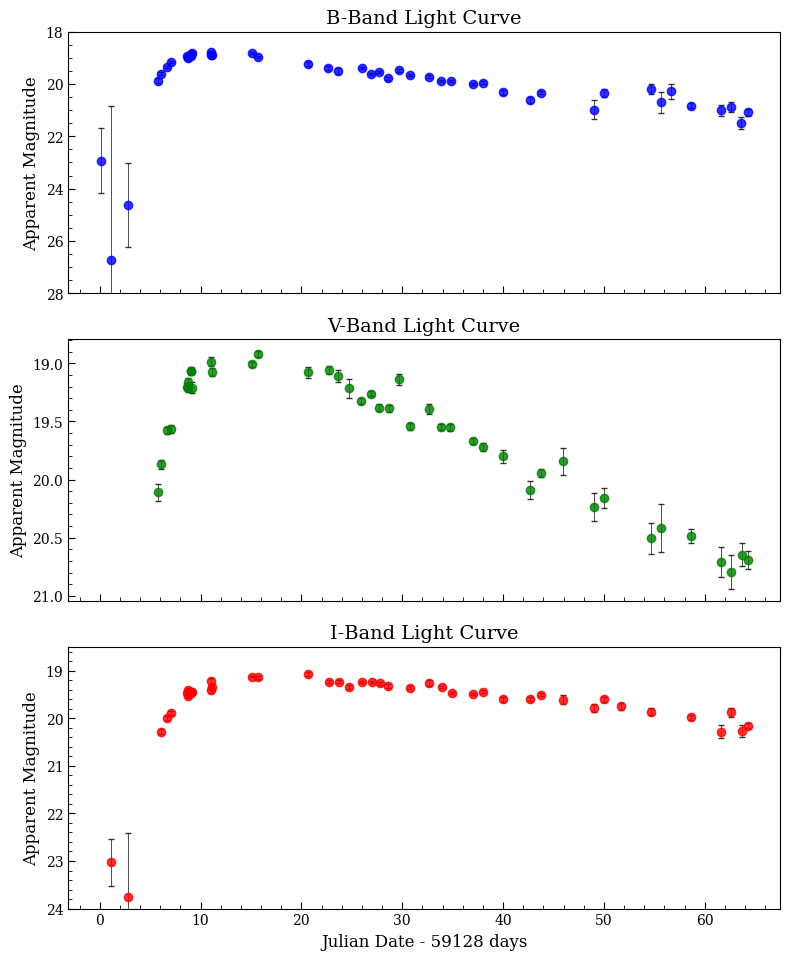

In [6]:
# Plot light curves
gr = 1.618033988749
scale = 6
fig, (a0,a1,a2) = plt.subplots(figsize=(8,gr*scale),
                               nrows=3,sharex=True)
a0.set_title("B-Band Light Curve",fontsize=14)
a0.errorbar(B_dates,B_mags,yerr=B_mags_err,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a0.set_ylabel("Apparent Magnitude",fontsize=12)
a0.invert_yaxis()
a0.set_ylim([28,18])
a0.tick_params(axis='y', labelsize=10)
a0.yaxis.set_minor_locator(MultipleLocator(.5))

a1.set_title("V-Band Light Curve",fontsize=14)
a1.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a1.set_ylabel("Apparent Magnitude",fontsize=12)
a1.invert_yaxis()
a1.tick_params(axis='y', labelsize=10)
a1.yaxis.set_minor_locator(MultipleLocator(.1))

a2.set_title("I-Band Light Curve",fontsize=14)
a2.errorbar(I_dates,I_mags,yerr=I_mags_err,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a2.set_ylabel("Apparent Magnitude",fontsize=12)
a2.invert_yaxis()
a2.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=12)
a2.tick_params(axis='both', labelsize=10)
a2.set_ylim([24,18.5])
a2.yaxis.set_minor_locator(MultipleLocator(.2))
a2.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.savefig("Corrected LCs.png")
plt.show()

### Interpolation
In order to apply bolometric corrections we need to ensure magnitudes are taken in the same epoch, which means we need to interpolate either the B-band light curve or the V-band light curve in order to match the epochs. For the interpolation we will be using a linear and a cubic spline interpolation from the scipy.interpolate package. We then later plan on comparing the bolometric light curves generated by each interpolation method.

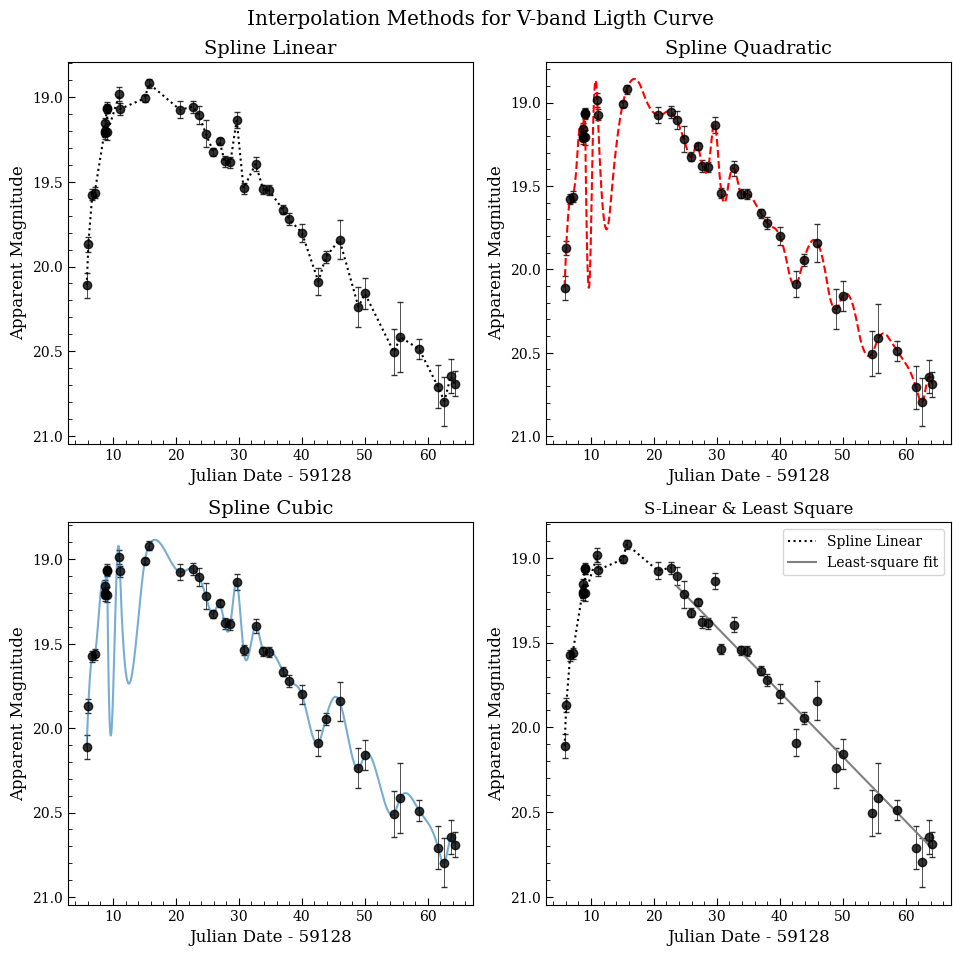

In [7]:
from scipy.interpolate import CubicSpline,interp1d,PPoly,barycentric_interpolate
from scipy.optimize import curve_fit
# Generate domains for interpolation 
N = 1000
dummy_domain = np.linspace(V_dates[3],V_dates[-1],N)

# Try different methods of interpolation
CS = CubicSpline(V_dates[3:],V_mags[3:])
LI = interp1d(V_dates[3:],V_mags[3:],fill_value='extrapolate')
QU = interp1d(V_dates[3:],V_mags[3:],kind='quadratic')

# We will follow linear interpolation for the first 12 points and then we will perform a least-square fitting
# for the linear decay
def linear(x,a,b):
    return(x*a + b)
linear_domain = np.linspace(V_dates[19],V_dates[-1],N)
popt, pcov = curve_fit(linear,V_dates[19:],V_mags[19:],sigma=V_mags_err[19:],absolute_sigma=True)


fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(scale*gr,scale*gr),
                                 ncols=2, nrows=2)
fig.suptitle("Interpolation Methods for V-band Ligth Curve", fontsize='x-large')

a0.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a0.plot(dummy_domain,LI(dummy_domain),label="Linear",ls=':',c='k')
a0.invert_yaxis()
a0.set_title("Spline Linear",fontsize=14)
a0.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a0.set_ylabel("Apparent Magnitude",fontsize=12)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a1.plot(dummy_domain,QU(dummy_domain),label="Quadratic",c='red',ls='--')
a1.invert_yaxis()
a1.set_title("Spline Quadratic",fontsize=14)
a1.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a1.set_ylabel("Apparent Magnitude",fontsize=12)
a1.yaxis.set_minor_locator(MultipleLocator(.1))
a1.xaxis.set_minor_locator(MultipleLocator(2))

a2.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a2.plot(dummy_domain,CS(dummy_domain),label="Cubic Spline",alpha=0.6)
a2.invert_yaxis()
a2.set_title("Spline Cubic",fontsize=14)
a2.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a2.set_ylabel("Apparent Magnitude",fontsize=12)
a2.yaxis.set_minor_locator(MultipleLocator(.1))
a2.xaxis.set_minor_locator(MultipleLocator(2))

a3.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8)
a3.plot(V_dates[3:19],LI(V_dates[3:19]),label='Spline Linear',ls=':',c='k')
a3.plot(linear_domain,linear(linear_domain,*popt),c='gray',label='Least-square fit')
a3.legend()
a3.invert_yaxis()
a3.set_title("S-Linear & Least Square")
a3.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=12)
a3.set_ylabel("Apparent Magnitude",fontsize=12)
a3.yaxis.set_minor_locator(MultipleLocator(.1))
a3.xaxis.set_minor_locator(MultipleLocator(2))

plt.tight_layout()
plt.savefig("Interpolated LC.png")
plt.show()

Because we suspect ZN-7090 is a Type II-L SNe then we expect the light curve post peak would follow a linear decay, therefore, we see the best interpolation method that will highlight this linear decay is a linear interpolation method as this method does not add any sort of non-existing curvature past the peak. Furthermore, the linear interpolation capture the SBO phase pretty well and capture the curvature of the peak magnitude better than any of the ther methods of interpolation.

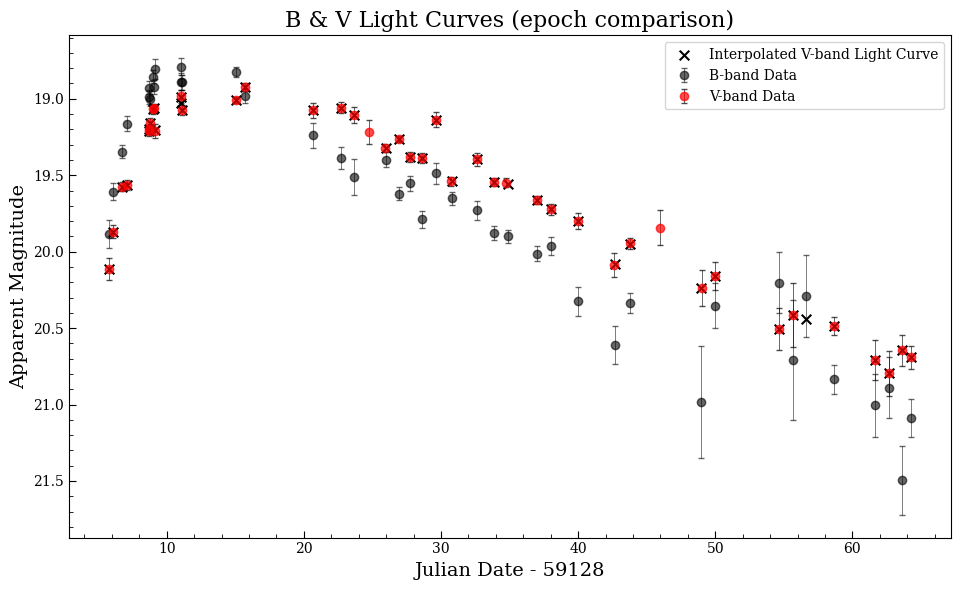

In [37]:
# Ignore the first 3 data poing of non detection from the B-band
B_dates_R = B_dates[3:]
B_mags_R = B_mags[3:]
B_mags_err_R = B_mags_err[3:]

# Compute V-band in the dates of B-band observations
V_mags_C = LI(B_dates_R)
# Select uncertainties only in the dates that work with v-band


# Plot both light curves on the same plot
# Remove 3 non-detection points of B-band
fig, a0 = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.scatter(B_dates_R,V_mags_C,label="Interpolated V-band Light Curve",marker='x',s=48,c='k')
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err[3:],fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.6,label='B-band Data')
a0.errorbar(V_dates,V_mags,yerr=V_mags_err,fmt='ro',ecolor='k',elinewidth=0.6,alpha=0.7,capsize=2,label='V-band Data')
a0.set_title("B & V Light Curves (epoch comparison)",fontsize=16)
a0.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=14)
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.yaxis.set_minor_locator(MultipleLocator(.1))
a0.xaxis.set_minor_locator(MultipleLocator(2))
a0.legend()
a0.invert_yaxis()
plt.tight_layout()
plt.show()

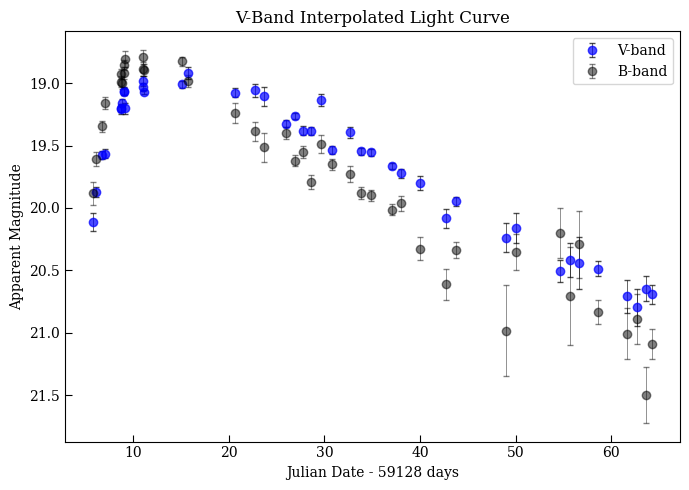

In [40]:
fig, a0 = plt.subplots(figsize=(7,5),ncols=1)
a0.errorbar(B_dates_R,V_mags_C,yerr=V_mags_err[3:],fmt='bo',ecolor='k',elinewidth=0.6,alpha=0.7,capsize=2,label='V-band')
a0.errorbar(B_dates_R,B_mags_R,yerr=B_mags_err_R,fmt='ko',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.5,label='B-band')
a0.invert_yaxis()
a0.legend()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days")
a0.set_ylabel("Apparent Magnitude")
a0.set_title("V-Band Interpolated Light Curve")
plt.tight_layout()
plt.show()

<h2 align="center"> Applying Martinez et al. $\href{https://ui.adsabs.harvard.edu/abs/2022A%26A...660A..40M/abstract}{2022}$ bolometric corrections <h2>

We will be using bolometric correction specific to the cooling phase because KSP-ZN7090 does not exhibit a plateau phase nor has entered a radiactive tail phase yet. The bolometric correction presented in this paper consists of a fourth order polynomial with a standard deviation of $\sigma = 0.12 $ which is explicitly written as follows.

$$
BC_{B,cool} = -0.740 + 4.472(B-V) - 9.637(B-V)^2 + 9.075(B-V)^3 - 3.290(B-V)^4
$$

Recall bolometric correction are defined as follows.

$$
BC_{B} = m_{bol} - m_{B}\\
m_{bol} = BC_{B} + m_{B}
$$

In [41]:
# Import Bolometric Correction given Martinez et al. coefficients
from Bolometric_Corrections import Martinez_cooling

# Compute the apparent bolometric magnitudes
mbol, mbol_err, Correction, Colour = Martinez_cooling(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err[3:])

In [42]:
# Propagate my own errors
from MyUncertainties import Uncertainties_BV_Martinez

my_mbol_err = Uncertainties_BV_Martinez(B_mags_R,V_mags_C,B_mags_err_R,V_mags_err[3:])

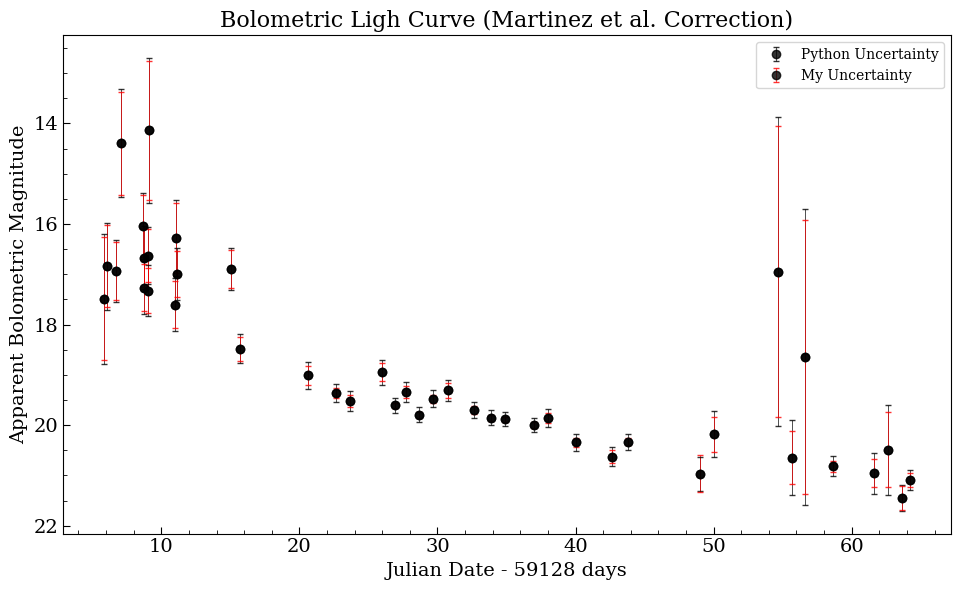

In [136]:
# Plot the bolometric light curve
fig, (a0) = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.set_title("Bolometric Ligh Curve (Martinez et al. Correction)",fontsize=16)
a0.errorbar(B_dates_R,mbol,yerr=mbol_err,fmt="ko",ecolor='k',capsize=2,elinewidth=0.6,alpha=0.8,label="Python Uncertainty")
a0.errorbar(B_dates_R,mbol,yerr=my_mbol_err,fmt="ko",ecolor='r',capsize=2,elinewidth=0.6,alpha=0.8,label="My Uncertainty")
a0.invert_yaxis()
a0.legend()
a0.set_xlabel(f"Julian Date - {int(dates[0])} days",fontsize=14)
a0.set_ylabel("Apparent Bolometric Magnitude",fontsize=14)
a0.tick_params(axis='both', labelsize=14)
a0.yaxis.set_minor_locator(MultipleLocator(.5))
a0.xaxis.set_minor_locator(MultipleLocator(2))
plt.tight_layout()

We notice on later dates the uncertaintiy in the bolometric magnitude becomes incredibly large, we must investigate if this is indeed the case or if there is some sort of coding issue. We Will begin by manually computing the uncertainties of these two data points and comparing them to the one provided by the uncertainties package.

In [53]:
print("Problem Childs")
print()

print("V-Band Uncertainty:",V_mags_err[-6],V_mags_err[-8])
print("B-Band Uncertainty:",B_mags_err[-6],B_mags_err[-8])
print("Bolometric Uncertainty:",mbol_err[-6],mbol_err[-8])

print()
print("My Propagation")
# Propagate color uncertainty
color1 = B_mags_R[-6] - V_mags_C[-6]
color2 = B_mags_R[-8] - V_mags_C[-8]
print("Colors:",color1,color2)
color_err1 = np.sqrt(V_mags_err[-6]**2 + B_mags_err[-6]**2)
color_err2 = np.sqrt(V_mags_err[-8]**2 + B_mags_err[-8]**2)
print('Color uncertainty:',color_err1,color_err2)

# Propagate for correction
c0,c1,c2,c3,c4 = 0.740, 4.472, 9.637, 9.075, 3.290
corr_err1 = (c1 - 2*c2*color1 + 3*c3*color1**2 - 4*c4*color1**3)*color_err1
corr_err2 = (c1 - 2*c2*color2 + 3*c3*color2**2 - 4*c4*color2**3)*color_err2
corr1 = -c0 + c1*color1 -c2*color1**2 + c3*color1**3 - c4*color1**4
corr2 = -c0 + c1*color2 -c2*color2**2 + c3*color2**3 - c4*color2**4
print("Corrections :",corr1,corr2)
print("Correction uncertainty:",corr_err1,corr_err2)

# Propagate for bolometric magnitude
mbol_err1 = np.sqrt(corr_err1**2 + B_mags_err[-6]**2)
mbol_err2 = np.sqrt(corr_err2**2 + B_mags_err[-8]**2)
print("Bolometric Magnitude Uncertainty:",mbol_err1,mbol_err2)

Problem Childs

V-Band Uncertainty: 0.208 0.089
B-Band Uncertainty: 0.27 0.2
Bolometric Uncertainty: 2.9364291466721983 3.070179886075288

My Propagation
Colors: -0.14812439080936812 -0.3028958326954019
Color uncertainty: 0.34082840257232083 0.218908656749796
Corrections : -1.6449334144093948 -3.2585874295511377
Correction uncertainty: 2.715399783608333 2.8837943116917795
Bolometric Magnitude Uncertainty: 2.7287902053511153 2.890721299631956


There are no major discrepancies between my propagration and the one done by the python package. We now must look into why the uncertainties are so big for these two specific points.

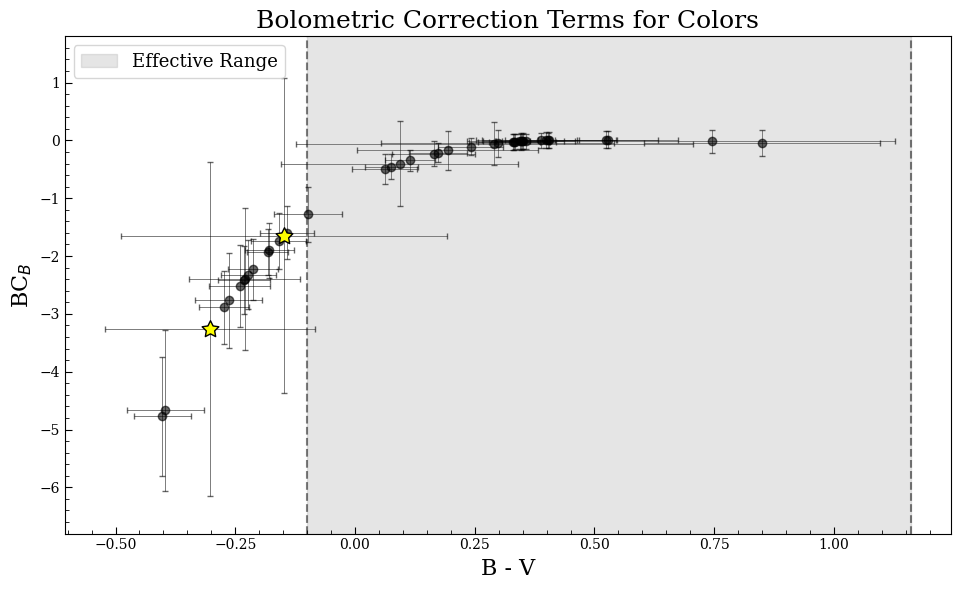

In [125]:
from uncertainties import ufloat,unumpy
# Look at the bolometric correction terms as a function of color
BC_val = unumpy.nominal_values(Correction)
BC_err = unumpy.std_devs(Correction)
C_val = unumpy.nominal_values(Colour)
C_err = unumpy.std_devs(Colour)

fig, a0 = plt.subplots(figsize=(gr*scale,scale),ncols=1)
a0.scatter([color1,color2],[corr1,corr2],s=160,marker=(5, 1),c='yellow',edgecolors='k',zorder=2)

a0.errorbar(unumpy.nominal_values(Colour),unumpy.nominal_values(Correction),xerr=unumpy.std_devs(Colour),\
            yerr=unumpy.std_devs(Correction),fmt="ko",ecolor='k',elinewidth=0.6,alpha=0.6,capsize=2,zorder=1)
a0.set_title("Bolometric Correction Terms for Colors",fontsize=18)
a0.set_xlabel("B - V",fontsize=16)
a0.set_ylabel(r"BC$_{B}$",fontsize=16)
a0.yaxis.set_minor_locator(MultipleLocator(.2))
a0.xaxis.set_minor_locator(MultipleLocator(0.05))
a0.vlines([-0.1,1.16],ymin=-7,ymax=2,ls='--',colors='k',alpha=0.5)
a0.axvspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a0.set_ylim([-6.8,1.8])
a0.legend(prop={"size":13})
plt.tight_layout()
plt.show()

We notice that these two data points have the largest bolometric correction error in the whole data set, as for the color error they seem to be about average. Therefore I believe the inflation is coming from the bolometric correction uncertainty, we will now investigate this uncertainty.

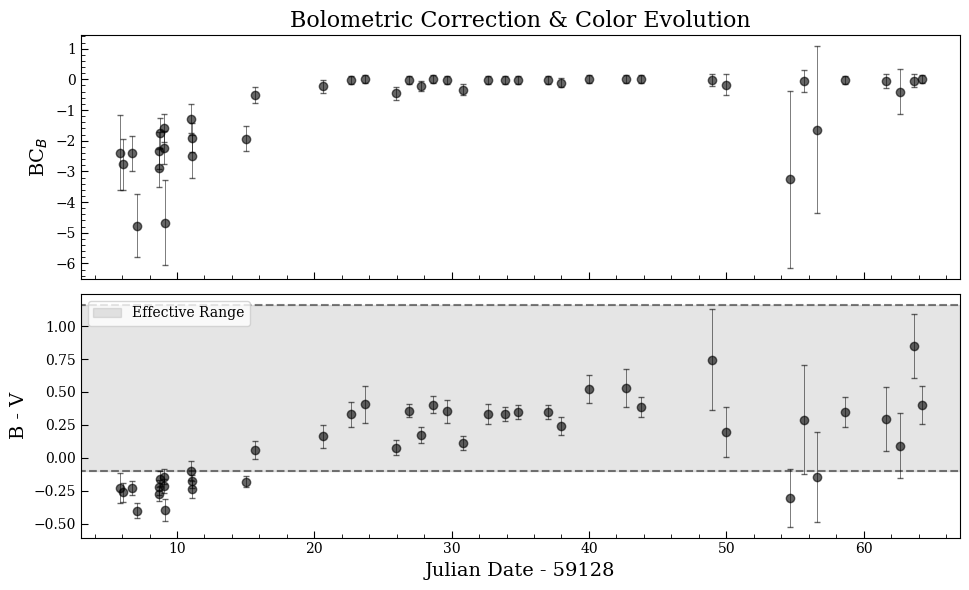

In [133]:
fig, (a0,a1) = plt.subplots(figsize=(gr*scale,scale),
                      nrows=2,sharex=True)
a0.errorbar(B_dates_R,unumpy.nominal_values(Correction),yerr=unumpy.std_devs(Correction),fmt='ko',\
           ecolor='k',elinewidth=0.6,alpha=0.6,capsize=2)
a0.set_title("Bolometric Correction & Color Evolution",fontsize=16)
a0.set_ylabel(r"BC$_B$",fontsize=14)
a0.yaxis.set_minor_locator(MultipleLocator(.2))
a0.xaxis.set_minor_locator(MultipleLocator(2))

a1.errorbar(B_dates_R,unumpy.nominal_values(Colour),yerr=unumpy.std_devs(Colour),fmt='ko',\
           ecolor='k',elinewidth=0.6,alpha=0.6,capsize=2)
a1.axhspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a1.hlines([-0.1,1.16],xmin=2,xmax=68,ls='--',colors='k',alpha=0.5)
a1.set_xlabel(f"Julian Date - {int(dates[0])}",fontsize=14)
a1.set_ylabel("B - V",fontsize=14)
a1.set_xlim([3,67])
a1.legend(loc='upper left')
plt.tight_layout()
plt.show()

We notice that in our color evolution plot our two data points are outside the effective range provided by Martinez, we must see how this affecting the bolometric uncertaitniy propagation by seeing how such quantity is sensitive to color.

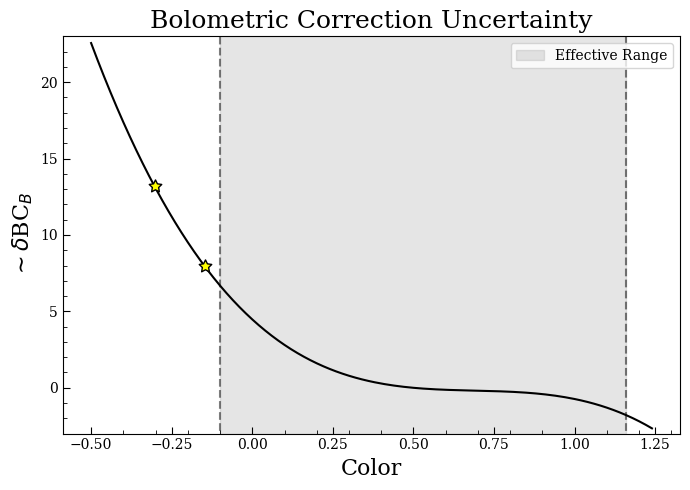

In [132]:
# Coefficients for corrections
c0,c1,c2,c3,c4 = 0.740, 4.472, 9.637, 9.075, 3.290

# Define fucntion of correction uncertainty
BC_prime = lambda x: c1 - 2*c2*x + 3*c3*x**2 - 4*c4*x**3
# Define mock domain of colors
mock_domain = np.arange(-0.5,1.25,0.01)

fig, a0 = plt.subplots(figsize=(7,5),
                      ncols=1)
a0.scatter([color1,color2],[BC_prime(color1),BC_prime(color2)],marker=(5, 1),c='yellow',edgecolors='k',s=90,zorder=2)
a0.plot(mock_domain,BC_prime(mock_domain),c='k',zorder=1)
a0.set_title("Bolometric Correction Uncertainty",fontsize=18)
a0.set_xlabel("Color",fontsize=16)
a0.set_ylabel(r"$\sim$$\delta$BC$_B$",fontsize=16)
a0.vlines([-0.1,1.16],ymin=-5,ymax=25,ls='--',colors='k',alpha=0.5)
a0.axvspan(-0.1, 1.16 , alpha=0.2, color='gray',label="Effective Range")
a0.set_ylim([-3,23])
a0.yaxis.set_minor_locator(MultipleLocator(1))
a0.xaxis.set_minor_locator(MultipleLocator(0.1))
a0.legend()
plt.tight_layout()
plt.show()

With this plot we can clearly explain the significant uncerainties in our bolometric light curve plot, we see that as (B-V) $\rightarrow$ $-0.5$ the uncertaity in the bolometric correction starts increasing significantly. The two point have color of -0.14 and -0.30 respectively, additionally their respective uncerainties are larger then those points at earlier epoch thus making their bolometric uncertainties much larger than the earlier data points. We can also comment that the effective range is give to points where we see their Bolometric uncertainty is close to zero

<h2 align="center"> Applying Layman et al. $\href{https://ui.adsabs.harvard.edu/abs/2014MNRAS.437.3848L/abstract}{2014}$ bolometric corrections <h2>

This paper provides several options for applying the method of bolometric corrections, we are provided with pseudo-bolometric correction and bolometric corrections for a general type II SNe sample. Furthermore, we also provide with a more general bolometric correction for their entire SNe sample which we also intend in using the pseudo-bolometric correction provided by this paper for type-II SNe.